<a href="https://colab.research.google.com/github/M-PRERNA/MACHINE-LEARNING/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

we need to reshape our 1d array into 2d array cauze the class Standard Scaler expects a 2d array as parameters

In [7]:
Y = Y.reshape(len(Y),1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

 - we apply Feature scaling when-
    > the dependant variable or the independant variable is     very large in size so that the features and the dependant variable are in the same range
 - we do not apply feature scaling when-

    >  - some dummy variables resulting from one hot encoding
    >  - when a dependant variable takes binary values (0,1) 
    >  - whwnever we apply a split in dataset, we do faeture scaling after the split



In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
sc_y = StandardScaler()
Y = sc_y.fit_transform(Y)

In [9]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [11]:
# ----------------------------- model start
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # rbf- gaussian radial basis function (most widely used kernels)
# ----------------------------- model end
# training the model
regressor.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

when we recieve the predicted output .. it comes in the scale of y we used in the feature scaling, so we need to reverse the scale of y

In [14]:
# regressor.predict([[6.5]]) cannot do this directly beacuse we have used a scaler
prediction = regressor.predict(sc.transform([[6.5]]))
sc_y.inverse_transform(regressor.predict(sc.transform([[6.5]]))) #the method used to transform the scaled prediction

array([131106.77303274])

## Visualising the SVR results

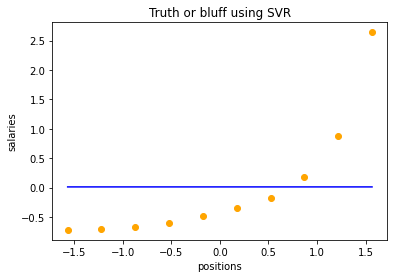

In [16]:
plt.scatter(X,Y, color='orange')
plt.plot(X,regressor.predict(sc.transform(X)),color = 'blue')
plt.title('Truth or bluff using SVR')
plt.xlabel('positions')
plt.ylabel('salaries')
plt.show()

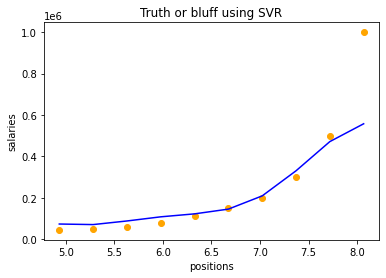

In [24]:
plt.scatter(sc.inverse_transform(X),sc_y.inverse_transform(Y), color='orange')
plt.plot(sc.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color = 'blue')
plt.title('Truth or bluff using SVR')
plt.xlabel('positions')
plt.ylabel('salaries')
plt.show()